In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [2]:
# This contains 70,000 images
fashion_mnist = tf.keras.datasets.fashion_mnist

# this splits the images taining and test and their corresponding labels
# train to 60000 and test to 10000
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [17]:
# there are a total of 10 image types
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
# there are a 10 values from 0 to 9 corresponding to the labels on the top
unique_values = set(train_labels)
unique_values

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

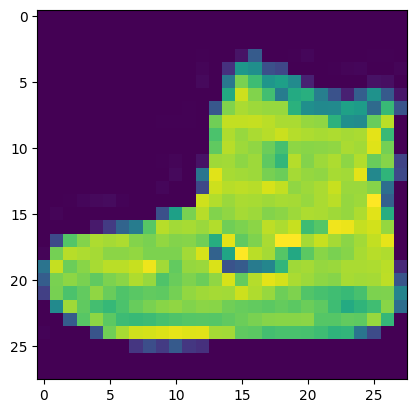

In [10]:
# view the first training image
# though the documentation says its gray scale image..
# this is a color image
# a gray scale image would only have shades of black and white as the other color.
plt.imshow(train_images[0])


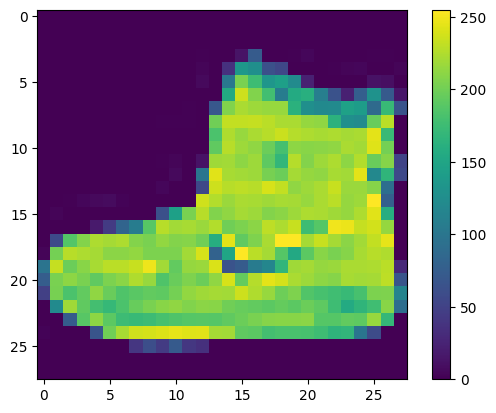

In [11]:
# Explore an image to find out about its data structure
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# fine details about the first image
first_image = train_images[0]
print("total elements:", first_image.size)
print ("28x28:", 28*28)


total elements: 784
28x28: 784


In [13]:
# find all unique values in the image
unique_values = np.unique(first_image)
print("unique values:", unique_values)
print("total unique values:", len(unique_values))

unique values: [  0   1   2   3   4   6   7  10  12  13  15  18  23  29  35  36  40  41
  44  48  52  54  55  56  57  58  61  62  64  65  66  67  69  72  73  74
  75  77  80  82  88  92  98  99 102 106 107 109 115 117 119 121 122 123
 127 130 134 136 141 144 145 146 150 154 155 156 159 161 163 164 166 167
 168 169 170 171 172 173 175 176 177 178 179 180 181 182 183 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 248 249 250 255]
total unique values: 151


In [14]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
# To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [15]:
# This should display same value less than 0
scaled_image = train_images[0]
scaled_unique_values = np.unique(scaled_image)
print("scaled unique values:", scaled_unique_values)

scaled unique values: [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.02352941
 0.02745098 0.03921569 0.04705882 0.05098039 0.05882353 0.07058824
 0.09019608 0.11372549 0.1372549  0.14117647 0.15686275 0.16078431
 0.17254902 0.18823529 0.20392157 0.21176471 0.21568627 0.21960784
 0.22352941 0.22745098 0.23921569 0.24313725 0.25098039 0.25490196
 0.25882353 0.2627451  0.27058824 0.28235294 0.28627451 0.29019608
 0.29411765 0.30196078 0.31372549 0.32156863 0.34509804 0.36078431
 0.38431373 0.38823529 0.4        0.41568627 0.41960784 0.42745098
 0.45098039 0.45882353 0.46666667 0.4745098  0.47843137 0.48235294
 0.49803922 0.50980392 0.5254902  0.53333333 0.55294118 0.56470588
 0.56862745 0.57254902 0.58823529 0.60392157 0.60784314 0.61176471
 0.62352941 0.63137255 0.63921569 0.64313725 0.65098039 0.65490196
 0.65882353 0.6627451  0.66666667 0.67058824 0.6745098  0.67843137
 0.68627451 0.69019608 0.69411765 0.69803922 0.70196078 0.70588235
 0.70980392 0.71372549 0.71764706 0.7254

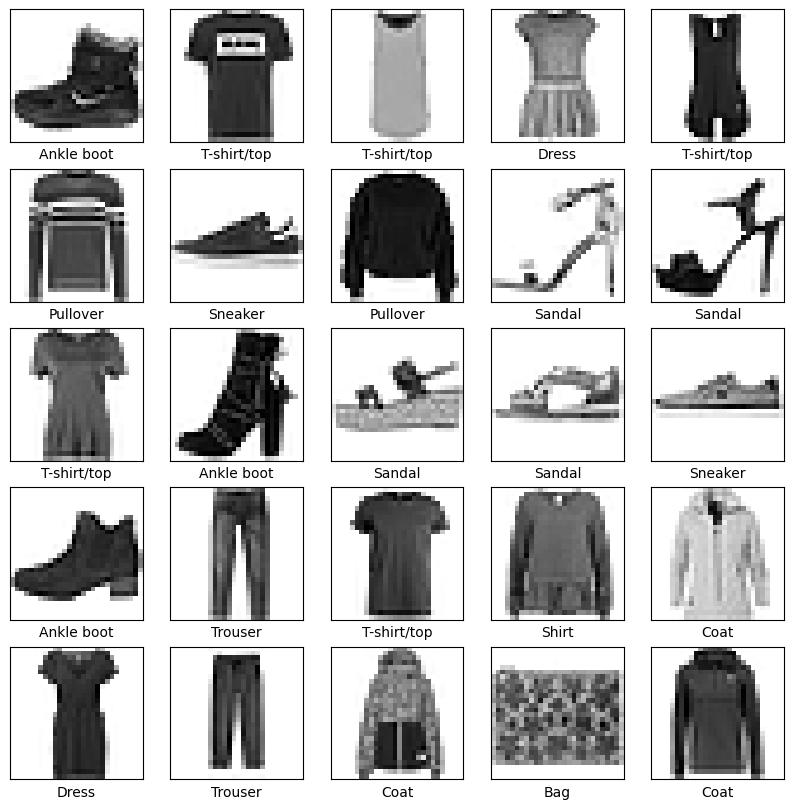

In [18]:
# to verify there is no loss of image we can render the image with the binary keyword to show these values are between 0 and 1
# here its showing in grey scale have to check how
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
# Build the model
# The first one is the input image so 28x28 = 784
# The last layer is the output required so 10
# Not sure why there is a 128 on the dense layer
# This layer is said to be in the powers of 2 pow 7 = 25 = 128, 2pow 8 = 256 and so on
# TODO find out why 128 was used
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input"),
    tf.keras.layers.Dense(128, activation='relu', name="hidden"),
    tf.keras.layers.Dense(10, name="output")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Compile the model
# This requires a optimizer, loss function and a metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# view the model
# input 28*28 = 784
# hidden 784*128 + 128 = 100,480
# output 128*10 + 10 = 1290
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Feed the data to train the model
# this should take a time
# how did we get 1875? there were 60,000 images
# the default batch size is 32 os 60000/32 = 1875
# note that the accurcy increases as the no of epochs increases
# the loss also decrease as the epochs increase
# this may not be always true but mostly it would folow this pattern
# model.fit(x_train, y_train, batch_size=64, epochs=10)
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7817 - loss: 0.6238
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8638 - loss: 0.3779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8741 - loss: 0.3420
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8844 - loss: 0.3132
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8914 - loss: 0.2924
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8965 - loss: 0.2777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9010 - loss: 0.2680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9063 - loss: 0.2484
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9098 - loss: 0.2446
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9108 - loss: 0.2421


In [32]:
# Test the trained model on the test data to see its accuracy on untrained data
# The accuracy is lower than the training accuracy of 0.9108 compared to 0.8844
# total of 10000 images / 32 = 312.5 rounding to another batch = 313 batches
# last batch would have only 16 images
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2, batch_size=32)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8844 - loss: 0.3300

Test accuracy: 0.8844000101089478


In [30]:
# using a trained model on can get the linear output
# TODO not sure what this means have to do RnD
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [33]:
# now pass the test images and get output for each image
predictions = probability_model.predict(test_images, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
# look at the first prediction
# there are 10 numbers from each neuron in the output layer
predictions[0]

array([4.19197278e-07, 4.25297042e-09, 6.89530044e-10, 1.74231463e-10,
       1.33727225e-08, 7.72380372e-05, 4.75896229e-08, 7.78606161e-03,
       7.19893342e-06, 9.92128909e-01], dtype=float32)

In [35]:
# there is a utility that provides the highest probability
# it predicted 9
np.argmax(predictions[0])

np.int64(9)

In [37]:
# check what is the class name 9
class_names[9]

'Ankle boot'

In [39]:
# check the test data label for the first image
# both the test and the prediction are 9 so this was correct
test_labels[0]

np.uint8(9)

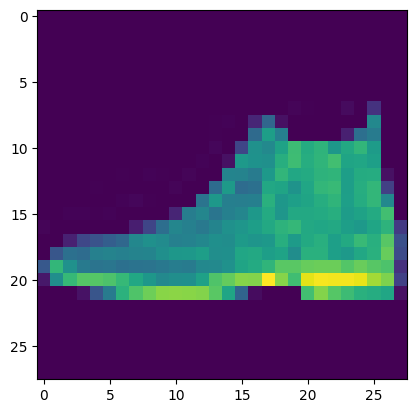

In [41]:
# you can also view the first test image
# its displaying even though we have divied by 256
plt.imshow(test_images[0])

In [43]:
# the predictions now have an array for each of the 10000 test images
len(predictions)

10000

In [45]:
# We now need to plot the images in test with the value in the predictions.
# if the image is true we just render it as it is
# if its false we render the lable as red with what was the wrong prediction
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [46]:
# we now define another graph of what was the predicted value
# if the value wrong we put that chart in red
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


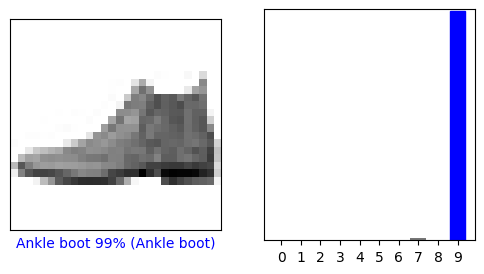

In [47]:
# verify for the first image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

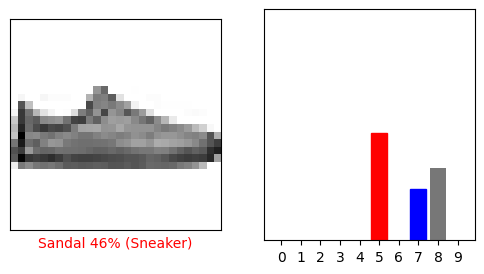

In [48]:
# plot the image where the prediction was wrong
# the no 12 is picked up as its already known this is wrong
# here the model is not confident as more than one possible value is present
# TODO find all wrong predictions
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

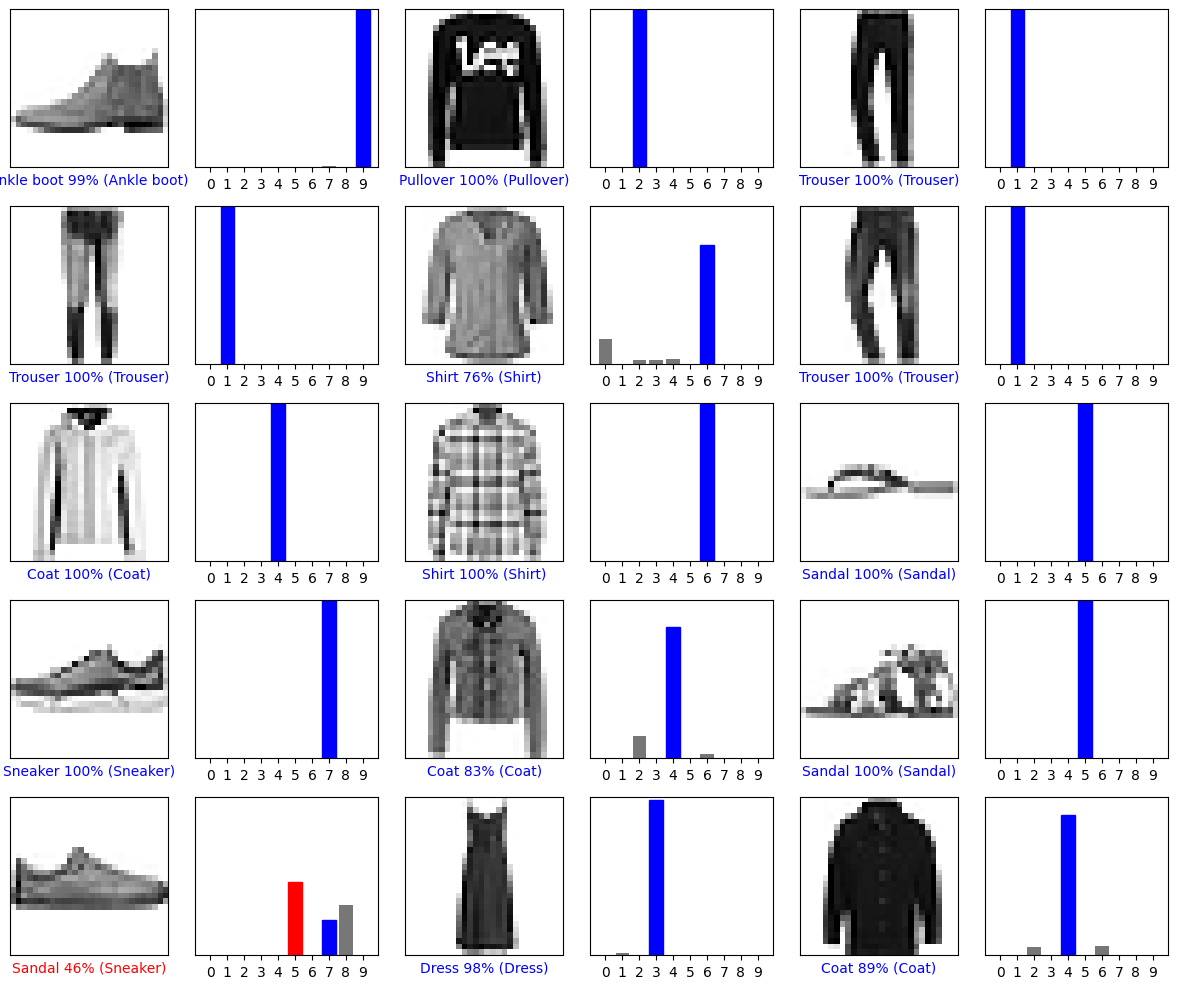

In [49]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident.
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# this plot the first 15 image classification
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

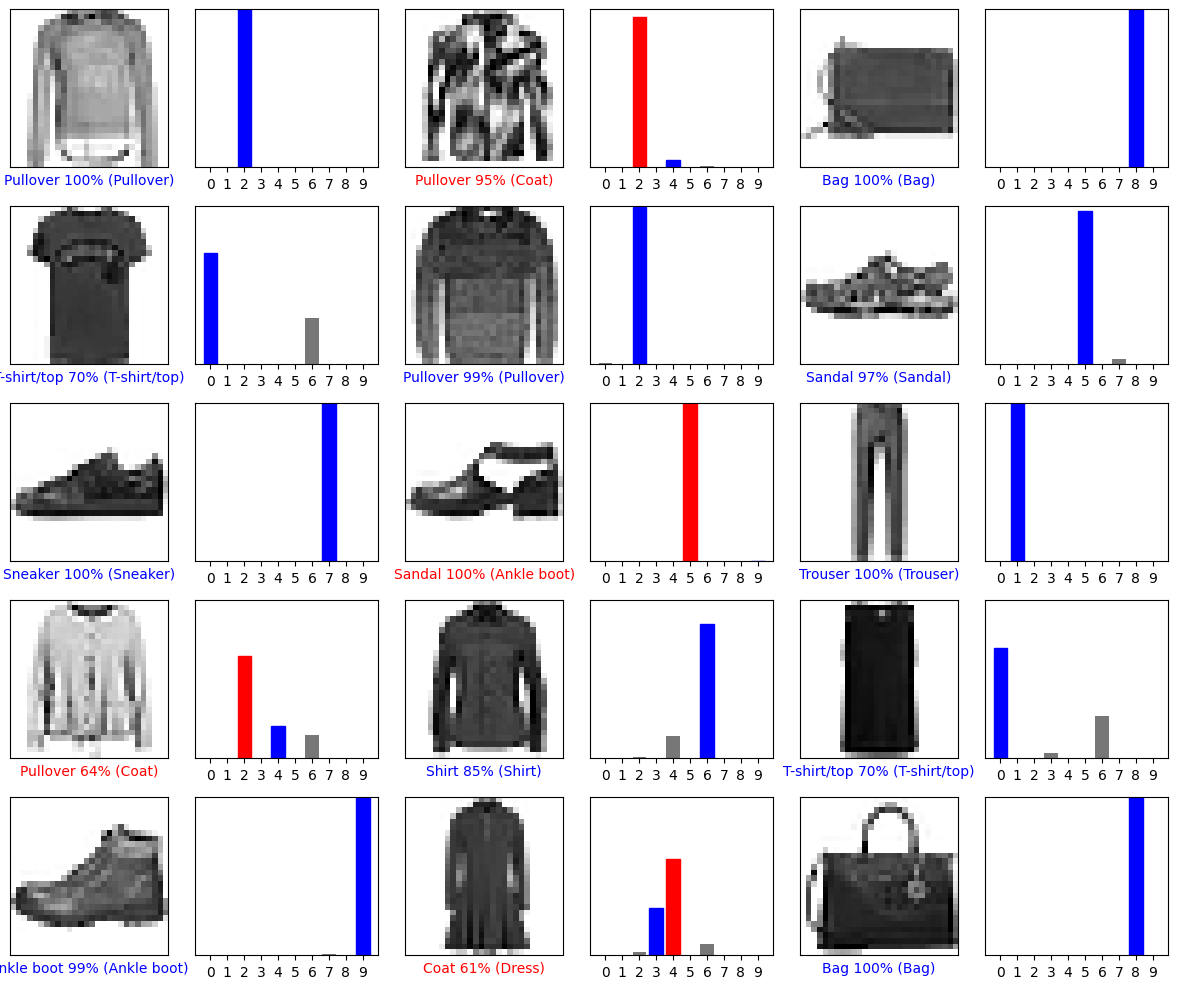

In [51]:
# keep changing the start at in step of 15 + 1 to see the other predictions
start_at = 16
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  image_at = start_at + i
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(image_at, predictions[image_at], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(image_at, predictions[image_at], test_labels)
plt.tight_layout()
plt.show()

In [56]:
# verify if its moving the rendering
print("predicted value:", np.argmax(predictions[16]))
print("test value:", test_labels[16])
print("Class Name:", class_names[2])

predicted value: 2
test value: 2
Class Name: Pullover


In [57]:
# predicting a single image
# Grab an image from the test dataset.
img = test_images[31]

print(img.shape)

(28, 28)


In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[3.7122979e-07 1.9203408e-11 9.7792956e-09 1.3849378e-08 1.0622759e-06
  9.0804564e-10 1.3045323e-08 5.5935547e-12 9.9999857e-01 3.3715516e-14]]


In [63]:
# the test image
test_labels[31]

np.uint8(8)

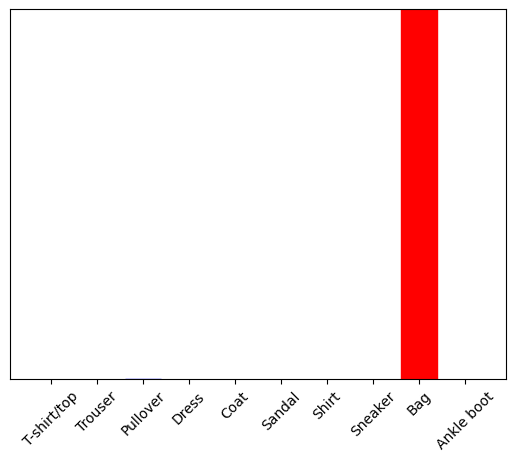

In [60]:
# plot the prediction
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [61]:
# verify the prediction
np.argmax(predictions_single[0])

np.int64(8)

In [62]:
class_names[8]

'Bag'